In [1]:
import sqlite3
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
params = {'axes.labelsize' : 14, 'axes.titlesize' : 14,
          'font.size' : 14, 'legend.fontsize' : 14,
          'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rcParams.update(params)

In [3]:
conn = sqlite3.connect('../data/netflix-data-aggregated.db')

netflix = pd.read_sql_query('select * from netflix_meta',
                            con=conn, parse_dates=['dtime'])

traceroute = pd.read_sql_query('select * from traceroute_meta',
                                con=conn, parse_dates=['dtime'])

conn.close()

In [4]:
netflix

,unit_id,dtime,src_asn_v4,src_holder_v4,address_v4,dst_asn_v4,dst_holder_v4,connect_time_v4,bytes_sec_v4,src_asn_v6,src_holder_v6,address_v6,dst_asn_v6,dst_holder_v6,connect_time_v6,bytes_sec_v6,delta_connect_time,delta_bytes_sec
0,123256,2016-07-22 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,20515,10371717,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,16803,10674265,3712,-302548
1,123256,2016-07-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,16457,10272516,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,17265,10867458,-808,-594942
2,123256,2016-12-15 23:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,18057,9869233,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,17221,10550408,836,-681175
3,148650,2016-10-04 18:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,26762,4514214,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,26208,4415574,554,98640
4,950210,2018-03-08 20:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,26690,1774382,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,26973,1756487,-283,17895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969503,661028,2017-10-09 06:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10425,9708303,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10522,10853290,-97,-1144987
969504,661028,2017-10-09 07:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10384,9921601,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10550,9709498,-166,212103
969505,661028,2017-10-18 06:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10499,10911879,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10550,10648217,-51,263662
969506,661028,2017-10-18 07:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10513,9953607,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10445,9987885,68,-34278


In [5]:
traceroute

,unit_id,dtime,src_asn_v4,src_holder_v4,destination_v4,dst_asn_v4,dst_holder_v4,ttl_v4,rtt_v4,src_asn_v6,src_holder_v6,destination_v6,dst_asn_v6,dst_holder_v6,ttl_v6,rtt_v6,delta_ttl,delta_rtt
0,123256,2016-07-22 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,8,16.989,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,9,14.370,-1,2.619
1,123256,2016-07-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,8,13.484,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,9,14.786,-1,-1.302
2,123256,2016-12-15 23:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,8,15.452,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,9,13.122,-1,2.330
3,148650,2016-10-04 18:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,6,26.841,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,6,25.611,0,1.230
4,950210,2018-03-08 20:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,5,24.924,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,5,25.451,0,-0.527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894934,950218,2019-04-23 00:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.607,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.861,0,-0.254
894935,950218,2019-04-26 00:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.704,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.947,0,-0.243
894936,950218,2019-04-26 02:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.803,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.855,0,-0.052
894937,950218,2019-04-27 00:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,15.044,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,15.010,0,0.034


In [6]:
for col in ['connect_time_v4', 'connect_time_v6']:
    netflix[col] = netflix[col]/1000.0

In [7]:
for df in [netflix, traceroute]:
    df['v4_cache'] = df['src_asn_v4'] == df['dst_asn_v4']
    df['v6_cache'] = df['src_asn_v6'] == df['dst_asn_v6']

In [8]:
netflix_v4_cache = netflix[netflix['v4_cache']]
netflix_v6_cache = netflix[netflix['v6_cache']]

netflix_v4_no_cache = netflix[~netflix['v4_cache']]
netflix_v6_no_cache = netflix[~netflix['v6_cache']]

In [9]:
traceroute_v4_cache = traceroute[traceroute['v4_cache']]
traceroute_v6_cache = traceroute[traceroute['v6_cache']]

traceroute_v4_no_cache = traceroute[~traceroute['v4_cache']]
traceroute_v6_no_cache = traceroute[~traceroute['v6_cache']]

In [10]:
import Cdf

ttl_cache_v4 = Cdf.MakeCdfFromList(traceroute_v4_cache['ttl_v4'])
ttl_cdn_v4 = Cdf.MakeCdfFromList(traceroute_v4_no_cache['ttl_v4'])

ttl_cache_v6 = Cdf.MakeCdfFromList(traceroute_v6_cache['ttl_v6'])
ttl_cdn_v6 = Cdf.MakeCdfFromList(traceroute_v6_no_cache['ttl_v6'])

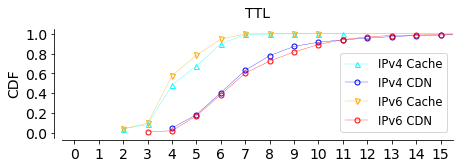

In [11]:
cdf_fig, cdf_ax = plt.subplots(figsize = (7, 2))

cdf_ax.plot(ttl_cache_v4.xs, ttl_cache_v4.ps, marker = '^', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'cyan')
cdf_ax.plot(ttl_cdn_v4.xs, ttl_cdn_v4.ps, marker = 'o', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'blue')
cdf_ax.plot(ttl_cache_v6.xs, ttl_cache_v6.ps, marker = 'v', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'orange')
cdf_ax.plot(ttl_cdn_v6.xs, ttl_cdn_v6.ps, marker = 'o', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'red')

yticks = np.arange(0,1.1,0.2)
cdf_ax.grid(False)
cdf_ax.set_yticks(yticks)
cdf_ax.set_ylim([-0.05,1.05])
cdf_ax.set_xlim([-0.5,15.5])
cdf_ax.set_xscale('linear')
cdf_ax.set_xlabel('')
cdf_ax.set_ylabel('CDF')

cdf_ax.legend(["IPv4 Cache", "IPv4 CDN", "IPv6 Cache", "IPv6 CDN"], fontsize = 'small', loc = 'lower right')

cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.02))
cdf_ax.spines['left'].set_position(('axes', -0.02))

xticks = np.arange(0,16,1)
cdf_ax.set_xticks(xticks)

cdf_ax.set_title('TTL', y = 1.05)

cdf_fig.savefig('../plots/path-lengths-cache-vs-cdn.pdf', bbox_inches = 'tight')
plt.show()

In [12]:
cdfs = [('TTL v4 CACHE', ttl_cache_v4),
        ('TTL v4 CDN', ttl_cdn_v4),
        ('TTL v6 CACHE', ttl_cache_v6),
        ('TTL v6 CDN', ttl_cdn_v6)]

In [13]:
print('TTL')
print('--------------------')
for version, cdf in cdfs:
    print(version)
    print('--------------------')
    skip = max(int(len(cdf.xs)/150), 1)
    for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
        print('%.2f\t%.5f' % (x, p))
    print('\n====================\n')

TTL
--------------------
TTL v4 CACHE
--------------------
2.00	0.03728
3.00	0.08351
4.00	0.48215
5.00	0.67383
6.00	0.89738
7.00	0.99466
8.00	0.99882
9.00	0.99973
10.00	0.99993
11.00	0.99996
17.00	0.99998
19.00	1.00000


TTL v4 CDN
--------------------
4.00	0.04746
5.00	0.18179
6.00	0.40437
7.00	0.63207
8.00	0.77888
9.00	0.87323
10.00	0.91475
11.00	0.94044
12.00	0.95567
13.00	0.97267
14.00	0.98248
15.00	0.98814
16.00	0.99127
17.00	0.99458
18.00	0.99591
19.00	0.99681
20.00	0.99739
21.00	0.99761
22.00	0.99782
23.00	0.99826
24.00	0.99866
25.00	0.99896
26.00	0.99920
27.00	0.99922
28.00	0.99924
29.00	0.99934
30.00	0.99946
31.00	0.99946
32.00	0.99951
33.00	0.99957
34.00	0.99959
35.00	0.99997
38.00	0.99998
39.00	0.99998
42.00	0.99999
43.00	1.00000


TTL v6 CACHE
--------------------
2.00	0.04115
3.00	0.09405
4.00	0.57729
5.00	0.78326
6.00	0.94669
7.00	0.99863
8.00	0.99989
9.00	0.99995
10.00	0.99996
17.00	0.99999
19.00	1.00000


TTL v6 CDN
--------------------
3.00	0.00848
4.00	0.01910
5.00	0.

In [14]:
tcp_conn_cache_v4 = Cdf.MakeCdfFromList(netflix_v4_cache['connect_time_v4'])
tcp_conn_cdn_v4 = Cdf.MakeCdfFromList(netflix_v4_no_cache['connect_time_v4'])

tcp_conn_cache_v6 = Cdf.MakeCdfFromList(netflix_v6_cache['connect_time_v6'])
tcp_conn_cdn_v6 = Cdf.MakeCdfFromList(netflix_v6_no_cache['connect_time_v6'])

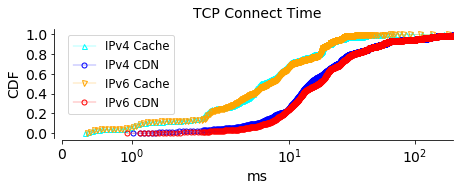

In [15]:
cdf_fig, cdf_ax = plt.subplots(figsize = (7, 2))

cdf_ax.plot(tcp_conn_cache_v4.xs, tcp_conn_cache_v4.ps, marker = '^', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'cyan', markevery = 50)
cdf_ax.plot(tcp_conn_cdn_v4.xs, tcp_conn_cdn_v4.ps, marker = 'o', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'blue', markevery = 50)
cdf_ax.plot(tcp_conn_cache_v6.xs, tcp_conn_cache_v6.ps, marker = 'v', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'orange', markevery = 50)
cdf_ax.plot(tcp_conn_cdn_v6.xs, tcp_conn_cdn_v6.ps, marker = 'o', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'red', markevery = 50)

yticks = np.arange(0,1.1,0.2)
cdf_ax.grid(False)
cdf_ax.set_yticks(yticks)
cdf_ax.set_ylim([-0.05,1.05])
cdf_ax.set_xlim([0,200])
cdf_ax.set_xscale('symlog')
cdf_ax.set_xlabel('ms')
cdf_ax.set_ylabel('CDF')

cdf_ax.legend(["IPv4 Cache", "IPv4 CDN", "IPv6 Cache", "IPv6 CDN"], fontsize = 'small', loc = 'upper left')

cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.02))
cdf_ax.spines['left'].set_position(('axes', -0.02))

cdf_ax.set_title('TCP Connect Time', y = 1.05)
cdf_fig.savefig('../plots/tcp-conn-cache-vs-cdn.pdf', bbox_inches = 'tight')
plt.show()

In [16]:
cdfs = [('TCP CONN v4 CACHE', tcp_conn_cache_v4),
        ('TCP CONN v4 CDN', tcp_conn_cdn_v4),
        ('TCP CONN v6 CACHE', tcp_conn_cache_v6),
        ('TCP CONN v6 CDN', tcp_conn_cdn_v6)]

print('TCP CONN')
print('--------------------')
for version, cdf in cdfs:
    print(version)
    print('--------------------')
    skip = max(int(len(cdf.xs)/150), 1)
    for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
        print('%.2f\t%.5f' % (x, p))
    print('\n====================\n')

TCP CONN
--------------------
TCP CONN v4 CACHE
--------------------
0.32	0.00000
0.54	0.03584
0.76	0.04077
0.97	0.06035
1.18	0.10480
1.39	0.11430
1.60	0.12222
1.81	0.13404
2.02	0.16146
2.24	0.21475
2.45	0.24223
2.66	0.25170
2.87	0.25731
3.08	0.26192
3.29	0.26860
3.50	0.27944
3.71	0.29519
3.92	0.30934
4.14	0.32678
4.35	0.33761
4.56	0.35199
4.77	0.36858
4.98	0.39428
5.19	0.41441
5.40	0.43914
5.61	0.47318
5.82	0.49616
6.04	0.50651
6.25	0.51145
6.46	0.51626
6.67	0.52392
6.88	0.53364
7.09	0.54293
7.30	0.54996
7.51	0.55745
7.72	0.56511
7.93	0.57658
8.15	0.59525
8.36	0.61212
8.57	0.62452
8.78	0.63367
8.99	0.64193
9.20	0.65081
9.41	0.66389
9.62	0.67726
9.83	0.69274
10.04	0.70535
10.26	0.71438
10.47	0.72144
10.68	0.72564
10.89	0.72899
11.10	0.73151
11.32	0.73385
11.56	0.73582
11.79	0.73755
12.02	0.74016
12.23	0.74494
12.44	0.74971
12.65	0.75423
12.86	0.75824
13.08	0.76143
13.30	0.76440
13.53	0.76648
13.79	0.76821
14.06	0.76974
14.28	0.77247
14.52	0.77464
14.81	0.77595
15.03	0.77998
15.24	0.785